In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

Using TensorFlow backend.


In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,0
1,2,DSCF0900.JPG,800,specialty,0
2,3,DSCF0904.JPG,1250,specialty,0
3,4,DSCF0905.JPG,400,specialty,0
4,5,DSCF0910.JPG,800,specialty,0
...,...,...,...,...,...
895,896,DSCF2197.JPG,800,off,4
896,897,DSCF2198.JPG,1250,off,4
897,898,DSCF2200.JPG,400,off,4
898,899,DSCF2201.JPG,800,off,4


In [0]:
width = 265#1920#530#265
height = 265#149#1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/900 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392B5A1D0>


  0%|          | 1/900 [00:06<1:29:54,  6.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922C7080>


  0%|          | 2/900 [00:06<1:06:25,  4.44s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922CC080>


  0%|          | 3/900 [00:07<48:43,  3.26s/it]  

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922CE898>


  0%|          | 4/900 [00:08<38:16,  2.56s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392B5A160>


  1%|          | 5/900 [00:09<30:27,  2.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922CC080>


  1%|          | 6/900 [00:10<25:41,  1.72s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D2320>


  1%|          | 7/900 [00:10<21:37,  1.45s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D72B0>


  1%|          | 8/900 [00:11<18:41,  1.26s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D8518>


  1%|          | 9/900 [00:12<17:00,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D5278>


  1%|          | 10/900 [00:13<15:17,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D5390>


  1%|          | 11/900 [00:13<13:20,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922DC240>


  1%|▏         | 12/900 [00:14<13:00,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E13C8>


  1%|▏         | 13/900 [00:15<11:36,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D91D0>


  2%|▏         | 14/900 [00:16<11:47,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E3080>


  2%|▏         | 15/900 [00:17<12:16,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E4470>


  2%|▏         | 16/900 [00:17<12:16,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E3780>


  2%|▏         | 17/900 [00:18<12:48,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E3080>


  2%|▏         | 18/900 [00:20<14:54,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E6320>


  2%|▏         | 19/900 [00:20<13:39,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E8B38>


  2%|▏         | 20/900 [00:22<14:21,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E9F60>


  2%|▏         | 21/900 [00:23<14:43,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E9F60>


  2%|▏         | 22/900 [00:23<13:31,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922E9278>


  3%|▎         | 23/900 [00:24<13:41,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EA080>


  3%|▎         | 24/900 [00:25<13:39,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EAE80>


  3%|▎         | 25/900 [00:26<13:31,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EA080>


  3%|▎         | 26/900 [00:27<13:41,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EAEF0>


  3%|▎         | 27/900 [00:28<14:21,  1.01it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EAC18>


  3%|▎         | 28/900 [00:29<12:58,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EAC18>


  3%|▎         | 29/900 [00:30<12:20,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBAC8>


  3%|▎         | 30/900 [00:31<12:40,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB7F0>


  3%|▎         | 31/900 [00:31<12:19,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBF28>


  4%|▎         | 32/900 [00:32<12:18,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB9B0>


  4%|▎         | 33/900 [00:33<11:59,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBDA0>


  4%|▍         | 34/900 [00:34<11:54,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB0B8>


  4%|▍         | 35/900 [00:35<11:47,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB780>


  4%|▍         | 36/900 [00:36<12:32,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB5F8>


  4%|▍         | 37/900 [00:36<12:10,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBA58>


  4%|▍         | 38/900 [00:37<12:41,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBBA8>


  4%|▍         | 39/900 [00:38<11:53,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBB70>


  4%|▍         | 40/900 [00:39<11:10,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB240>


  5%|▍         | 41/900 [00:39<10:50,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB048>


  5%|▍         | 42/900 [00:40<09:57,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB390>


  5%|▍         | 43/900 [00:41<10:15,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBEB8>


  5%|▍         | 44/900 [00:42<11:36,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBC88>


  5%|▌         | 45/900 [00:43<11:12,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB710>


  5%|▌         | 46/900 [00:43<10:46,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBF60>


  5%|▌         | 47/900 [00:44<10:43,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB8D0>


  5%|▌         | 48/900 [00:45<11:25,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBEB8>


  5%|▌         | 49/900 [00:45<10:18,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBB00>


  6%|▌         | 50/900 [00:46<10:38,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBA20>


  6%|▌         | 51/900 [00:47<11:56,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBBE0>


  6%|▌         | 52/900 [00:48<11:48,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBB00>


  6%|▌         | 53/900 [00:49<12:08,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB978>


  6%|▌         | 54/900 [00:50<13:22,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EB978>


  6%|▌         | 55/900 [00:51<12:48,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922EBBE0>


  6%|▌         | 56/900 [00:52<12:24,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1D30>


  6%|▋         | 57/900 [00:53<13:04,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1BE0>


  6%|▋         | 58/900 [00:53<11:49,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1860>


  7%|▋         | 59/900 [00:54<11:33,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1780>


  7%|▋         | 60/900 [00:55<10:25,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1BE0>


  7%|▋         | 61/900 [00:56<10:15,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1780>


  7%|▋         | 62/900 [00:56<10:37,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1EB8>


  7%|▋         | 63/900 [00:57<11:15,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1400>


  7%|▋         | 64/900 [00:58<11:05,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D15C0>


  7%|▋         | 65/900 [00:59<10:37,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1EF0>


  7%|▋         | 66/900 [00:59<10:33,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1748>


  7%|▋         | 67/900 [01:00<10:22,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D12B0>


  8%|▊         | 68/900 [01:01<09:15,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1F28>


  8%|▊         | 69/900 [01:02<10:33,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1978>


  8%|▊         | 70/900 [01:02<10:19,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1CC0>


  8%|▊         | 71/900 [01:03<10:34,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1208>


  8%|▊         | 72/900 [01:04<10:28,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D17F0>


  8%|▊         | 73/900 [01:05<10:29,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1080>


  8%|▊         | 74/900 [01:05<10:34,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1BA8>


  8%|▊         | 75/900 [01:07<11:54,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1940>


  8%|▊         | 76/900 [01:07<11:04,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D16A0>


  9%|▊         | 77/900 [01:08<11:37,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D15F8>


  9%|▊         | 78/900 [01:09<12:31,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1940>


  9%|▉         | 79/900 [01:10<11:54,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D17B8>


  9%|▉         | 80/900 [01:11<13:05,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D12E8>


  9%|▉         | 81/900 [01:12<13:59,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1470>


  9%|▉         | 82/900 [01:13<12:40,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D10B8>


  9%|▉         | 83/900 [01:14<13:36,  1.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1F98>


  9%|▉         | 84/900 [01:15<14:40,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1080>


  9%|▉         | 85/900 [01:16<13:20,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1320>


 10%|▉         | 86/900 [01:17<12:52,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1470>


 10%|▉         | 87/900 [01:18<12:58,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D11D0>


 10%|▉         | 88/900 [01:19<11:12,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1C18>


 10%|▉         | 89/900 [01:20<11:27,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1128>


 10%|█         | 90/900 [01:20<11:58,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1630>


 10%|█         | 91/900 [01:21<11:11,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922D1B70>


 10%|█         | 92/900 [01:22<12:43,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B860>


 10%|█         | 93/900 [01:23<12:18,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BB70>


 10%|█         | 94/900 [01:24<12:01,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BE80>


 11%|█         | 95/900 [01:25<11:22,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BC18>


 11%|█         | 96/900 [01:25<10:16,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BA90>


 11%|█         | 97/900 [01:26<10:28,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B9E8>


 11%|█         | 98/900 [01:27<11:26,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BE48>


 11%|█         | 99/900 [01:28<12:04,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BDA0>


 11%|█         | 100/900 [01:29<11:24,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BAC8>


 11%|█         | 101/900 [01:30<10:46,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B0F0>


 11%|█▏        | 102/900 [01:31<10:45,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B240>


 11%|█▏        | 103/900 [01:31<10:27,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BAC8>


 12%|█▏        | 104/900 [01:32<10:40,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B208>


 12%|█▏        | 105/900 [01:33<10:19,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B9B0>


 12%|█▏        | 106/900 [01:34<10:24,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BE48>


 12%|█▏        | 107/900 [01:35<11:24,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B208>


 12%|█▏        | 108/900 [01:36<12:22,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B940>


 12%|█▏        | 109/900 [01:37<12:30,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B668>


 12%|█▏        | 110/900 [01:37<11:20,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B198>


 12%|█▏        | 111/900 [01:38<11:37,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B940>


 12%|█▏        | 112/900 [01:39<10:52,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B2B0>


 13%|█▎        | 113/900 [01:40<10:18,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BD30>


 13%|█▎        | 114/900 [01:41<11:31,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B940>


 13%|█▎        | 115/900 [01:42<10:52,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BEF0>


 13%|█▎        | 116/900 [01:42<10:58,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B5F8>


 13%|█▎        | 117/900 [01:43<11:46,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BCF8>


 13%|█▎        | 118/900 [01:44<11:16,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B7B8>


 13%|█▎        | 119/900 [01:45<11:50,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B320>


 13%|█▎        | 120/900 [01:46<12:28,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B668>


 13%|█▎        | 121/900 [01:47<12:18,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B7B8>


 14%|█▎        | 122/900 [01:48<11:13,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BA20>


 14%|█▎        | 123/900 [01:49<11:10,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BEB8>


 14%|█▍        | 124/900 [01:50<11:06,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227B128>


 14%|█▍        | 125/900 [01:50<10:35,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BA20>


 14%|█▍        | 126/900 [01:51<10:35,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BDD8>


 14%|█▍        | 127/900 [01:52<10:31,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739227BDD8>


 14%|█▍        | 128/900 [01:52<09:09,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284860>


 14%|█▍        | 129/900 [01:54<10:44,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284978>


 14%|█▍        | 130/900 [01:54<10:50,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284C88>


 15%|█▍        | 131/900 [01:55<09:40,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284390>


 15%|█▍        | 132/900 [01:56<09:18,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284630>


 15%|█▍        | 133/900 [01:56<09:02,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284E48>


 15%|█▍        | 134/900 [01:57<09:37,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284400>


 15%|█▌        | 135/900 [01:58<09:11,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284BA8>


 15%|█▌        | 136/900 [01:58<08:46,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922848D0>


 15%|█▌        | 137/900 [01:59<09:32,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284A20>


 15%|█▌        | 138/900 [02:00<10:25,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284320>


 15%|█▌        | 139/900 [02:01<09:55,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284908>


 16%|█▌        | 140/900 [02:02<11:02,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284828>


 16%|█▌        | 141/900 [02:03<11:43,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922847F0>


 16%|█▌        | 142/900 [02:04<10:02,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922842E8>


 16%|█▌        | 143/900 [02:05<10:23,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284F28>


 16%|█▌        | 144/900 [02:05<10:46,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922847F0>


 16%|█▌        | 145/900 [02:06<10:40,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284438>


 16%|█▌        | 146/900 [02:07<10:19,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922847B8>


 16%|█▋        | 147/900 [02:08<11:03,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284470>


 16%|█▋        | 148/900 [02:09<10:53,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922849E8>


 17%|█▋        | 149/900 [02:10<10:26,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284198>


 17%|█▋        | 150/900 [02:10<10:04,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922844E0>


 17%|█▋        | 151/900 [02:11<09:36,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284CF8>


 17%|█▋        | 152/900 [02:12<09:04,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284748>


 17%|█▋        | 153/900 [02:13<09:52,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922843C8>


 17%|█▋        | 154/900 [02:13<09:34,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922840F0>


 17%|█▋        | 155/900 [02:15<11:03,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284DD8>


 17%|█▋        | 156/900 [02:16<11:21,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284908>


 17%|█▋        | 157/900 [02:16<11:21,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284748>


 18%|█▊        | 158/900 [02:17<10:37,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922840B8>


 18%|█▊        | 159/900 [02:18<10:57,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284898>


 18%|█▊        | 160/900 [02:19<10:29,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284CF8>


 18%|█▊        | 161/900 [02:19<09:21,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284EB8>


 18%|█▊        | 162/900 [02:21<10:35,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284EB8>


 18%|█▊        | 163/900 [02:21<10:32,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392284438>


 18%|█▊        | 164/900 [02:22<10:12,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E358>


 18%|█▊        | 165/900 [02:23<10:23,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EC18>


 18%|█▊        | 166/900 [02:24<09:49,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E898>


 19%|█▊        | 167/900 [02:25<10:08,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E5C0>


 19%|█▊        | 168/900 [02:26<11:13,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E780>


 19%|█▉        | 169/900 [02:26<10:18,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E978>


 19%|█▉        | 170/900 [02:27<10:06,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228ECC0>


 19%|█▉        | 171/900 [02:28<10:27,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EA58>


 19%|█▉        | 172/900 [02:29<09:25,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E978>


 19%|█▉        | 173/900 [02:30<09:38,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EFD0>


 19%|█▉        | 174/900 [02:31<10:26,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E9B0>


 19%|█▉        | 175/900 [02:31<10:20,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EB70>


 20%|█▉        | 176/900 [02:32<10:15,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E7B8>


 20%|█▉        | 177/900 [02:33<10:35,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EBE0>


 20%|█▉        | 178/900 [02:34<10:02,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EAC8>


 20%|█▉        | 179/900 [02:35<10:10,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EEB8>


 20%|██        | 180/900 [02:36<10:52,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E160>


 20%|██        | 181/900 [02:37<10:09,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E860>


 20%|██        | 182/900 [02:37<10:01,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E390>


 20%|██        | 183/900 [02:38<10:41,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EDD8>


 20%|██        | 184/900 [02:39<10:40,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EF28>


 21%|██        | 185/900 [02:40<10:08,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EEF0>


 21%|██        | 186/900 [02:41<09:22,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E710>


 21%|██        | 187/900 [02:41<08:56,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EB00>


 21%|██        | 188/900 [02:42<08:52,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EE10>


 21%|██        | 189/900 [02:43<08:29,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E748>


 21%|██        | 190/900 [02:44<08:50,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EF60>


 21%|██        | 191/900 [02:44<08:33,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E0F0>


 21%|██▏       | 192/900 [02:45<09:41,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E240>


 21%|██▏       | 193/900 [02:46<09:02,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228ECF8>


 22%|██▏       | 194/900 [02:47<09:28,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E748>


 22%|██▏       | 195/900 [02:48<09:39,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E668>


 22%|██▏       | 196/900 [02:48<09:25,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228ECF8>


 22%|██▏       | 197/900 [02:49<08:26,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EC50>


 22%|██▏       | 198/900 [02:50<09:31,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228E668>


 22%|██▏       | 199/900 [02:51<09:11,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739228EBA8>


 22%|██▏       | 200/900 [02:51<09:02,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295860>


 22%|██▏       | 201/900 [02:52<08:15,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295CC0>


 22%|██▏       | 202/900 [02:53<09:05,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922952E8>


 23%|██▎       | 203/900 [02:54<09:02,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295860>


 23%|██▎       | 204/900 [02:55<09:46,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922952B0>


 23%|██▎       | 205/900 [02:55<08:35,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295048>


 23%|██▎       | 206/900 [02:56<07:59,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295A90>


 23%|██▎       | 207/900 [02:56<07:35,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295F98>


 23%|██▎       | 208/900 [02:57<07:42,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295F28>


 23%|██▎       | 209/900 [02:58<08:11,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295EB8>


 23%|██▎       | 210/900 [02:59<07:55,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295A20>


 23%|██▎       | 211/900 [02:59<07:14,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295C18>


 24%|██▎       | 212/900 [03:00<07:24,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295940>


 24%|██▎       | 213/900 [03:01<08:31,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295940>


 24%|██▍       | 214/900 [03:02<08:50,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295080>


 24%|██▍       | 215/900 [03:02<08:56,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922954E0>


 24%|██▍       | 216/900 [03:03<09:31,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295DA0>


 24%|██▍       | 217/900 [03:04<09:15,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295B70>


 24%|██▍       | 218/900 [03:05<09:04,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922950F0>


 24%|██▍       | 219/900 [03:06<08:46,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295CF8>


 24%|██▍       | 220/900 [03:06<08:56,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295780>


 25%|██▍       | 221/900 [03:07<08:57,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295C50>


 25%|██▍       | 222/900 [03:08<09:46,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295FD0>


 25%|██▍       | 223/900 [03:09<09:04,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922957B8>


 25%|██▍       | 224/900 [03:09<08:21,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295358>


 25%|██▌       | 225/900 [03:10<08:22,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295AC8>


 25%|██▌       | 226/900 [03:11<08:19,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922959B0>


 25%|██▌       | 227/900 [03:12<08:20,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295400>


 25%|██▌       | 228/900 [03:13<08:48,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295898>


 25%|██▌       | 229/900 [03:13<08:53,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295F98>


 26%|██▌       | 230/900 [03:14<09:02,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295AC8>


 26%|██▌       | 231/900 [03:15<10:20,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295278>


 26%|██▌       | 232/900 [03:16<10:01,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922957B8>


 26%|██▌       | 233/900 [03:17<09:38,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295AC8>


 26%|██▌       | 234/900 [03:18<09:50,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295AC8>


 26%|██▌       | 235/900 [03:19<09:14,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392295470>


 26%|██▌       | 236/900 [03:20<09:28,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2D30>


 26%|██▋       | 237/900 [03:21<10:02,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2518>


 26%|██▋       | 238/900 [03:21<09:39,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2240>


 27%|██▋       | 239/900 [03:22<09:16,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2CC0>


 27%|██▋       | 240/900 [03:23<10:02,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2198>


 27%|██▋       | 241/900 [03:24<09:46,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2E80>


 27%|██▋       | 242/900 [03:25<10:16,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A29B0>


 27%|██▋       | 243/900 [03:26<10:15,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2710>


 27%|██▋       | 244/900 [03:27<09:27,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2048>


 27%|██▋       | 245/900 [03:28<09:30,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A22E8>


 27%|██▋       | 246/900 [03:29<09:44,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2A58>


 27%|██▋       | 247/900 [03:29<09:33,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2EF0>


 28%|██▊       | 248/900 [03:30<09:11,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A25C0>


 28%|██▊       | 249/900 [03:31<09:59,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2668>


 28%|██▊       | 250/900 [03:32<08:48,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2D68>


 28%|██▊       | 251/900 [03:33<08:48,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2BA8>


 28%|██▊       | 252/900 [03:34<09:29,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2DD8>


 28%|██▊       | 253/900 [03:34<08:27,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2C18>


 28%|██▊       | 254/900 [03:35<08:14,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2978>


 28%|██▊       | 255/900 [03:36<09:15,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2828>


 28%|██▊       | 256/900 [03:37<08:10,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2780>


 29%|██▊       | 257/900 [03:38<08:58,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2278>


 29%|██▊       | 258/900 [03:39<09:08,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2208>


 29%|██▉       | 259/900 [03:39<08:33,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2DA0>


 29%|██▉       | 260/900 [03:40<08:29,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A22B0>


 29%|██▉       | 261/900 [03:41<09:43,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2AC8>


 29%|██▉       | 262/900 [03:42<09:04,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2550>


 29%|██▉       | 263/900 [03:43<08:57,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2630>


 29%|██▉       | 264/900 [03:44<09:13,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2748>


 29%|██▉       | 265/900 [03:45<09:00,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A22B0>


 30%|██▉       | 266/900 [03:45<09:17,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2898>


 30%|██▉       | 267/900 [03:46<09:33,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2320>


 30%|██▉       | 268/900 [03:47<09:12,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2DA0>


 30%|██▉       | 269/900 [03:48<09:22,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2898>


 30%|███       | 270/900 [03:49<09:43,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2390>


 30%|███       | 271/900 [03:50<09:32,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2390>


 30%|███       | 272/900 [03:51<08:59,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922A2E48>


 30%|███       | 273/900 [03:51<08:21,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AADA0>


 30%|███       | 274/900 [03:52<08:26,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAC88>


 31%|███       | 275/900 [03:53<08:11,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA390>


 31%|███       | 276/900 [03:54<08:58,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA630>


 31%|███       | 277/900 [03:55<08:54,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAE48>


 31%|███       | 278/900 [03:56<08:37,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA400>


 31%|███       | 279/900 [03:57<09:26,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AABA8>


 31%|███       | 280/900 [03:58<09:09,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA8D0>


 31%|███       | 281/900 [03:58<09:05,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAA20>


 31%|███▏      | 282/900 [04:00<09:37,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA320>


 31%|███▏      | 283/900 [04:00<09:07,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA908>


 32%|███▏      | 284/900 [04:01<08:41,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA828>


 32%|███▏      | 285/900 [04:02<08:58,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA5F8>


 32%|███▏      | 286/900 [04:03<08:57,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA2E8>


 32%|███▏      | 287/900 [04:04<09:07,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAF28>


 32%|███▏      | 288/900 [04:05<09:16,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAC50>


 32%|███▏      | 289/900 [04:05<08:12,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA358>


 32%|███▏      | 290/900 [04:06<08:14,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AABE0>


 32%|███▏      | 291/900 [04:07<08:28,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA898>


 32%|███▏      | 292/900 [04:08<07:57,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA358>


 33%|███▎      | 293/900 [04:08<07:58,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAFD0>


 33%|███▎      | 294/900 [04:10<09:29,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAEB8>


 33%|███▎      | 295/900 [04:11<09:14,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA0F0>


 33%|███▎      | 296/900 [04:11<07:52,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA1D0>


 33%|███▎      | 297/900 [04:12<08:45,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA9B0>


 33%|███▎      | 298/900 [04:13<08:20,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA128>


 33%|███▎      | 299/900 [04:14<08:37,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AABE0>


 33%|███▎      | 300/900 [04:15<09:06,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA3C8>


 33%|███▎      | 301/900 [04:16<08:54,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA2B0>


 34%|███▎      | 302/900 [04:17<08:53,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA1D0>


 34%|███▎      | 303/900 [04:18<09:38,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AAB38>


 34%|███▍      | 304/900 [04:18<08:19,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA0F0>


 34%|███▍      | 305/900 [04:19<08:53,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA7F0>


 34%|███▍      | 306/900 [04:20<09:36,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA7F0>


 34%|███▍      | 307/900 [04:21<08:37,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922AA748>


 34%|███▍      | 308/900 [04:22<08:55,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235D30>


 34%|███▍      | 309/900 [04:23<08:59,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235048>


 34%|███▍      | 310/900 [04:24<08:50,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235DA0>


 35%|███▍      | 311/900 [04:25<09:19,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922359B0>


 35%|███▍      | 312/900 [04:26<09:37,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235828>


 35%|███▍      | 313/900 [04:27<09:13,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922359E8>


 35%|███▍      | 314/900 [04:28<09:19,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235E48>


 35%|███▌      | 315/900 [04:29<10:07,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235668>


 35%|███▌      | 316/900 [04:30<09:16,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235518>


 35%|███▌      | 317/900 [04:31<08:41,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235B38>


 35%|███▌      | 318/900 [04:32<09:09,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922354E0>


 35%|███▌      | 319/900 [04:32<08:35,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922350F0>


 36%|███▌      | 320/900 [04:33<08:07,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235BA8>


 36%|███▌      | 321/900 [04:34<08:42,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922356D8>


 36%|███▌      | 322/900 [04:35<08:10,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922352E8>


 36%|███▌      | 323/900 [04:36<08:48,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922357B8>


 36%|███▌      | 324/900 [04:37<09:01,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922358D0>


 36%|███▌      | 325/900 [04:38<08:41,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235320>


 36%|███▌      | 326/900 [04:39<08:55,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235160>


 36%|███▋      | 327/900 [04:40<09:10,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235940>


 36%|███▋      | 328/900 [04:41<09:09,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235A20>


 37%|███▋      | 329/900 [04:42<09:14,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922355F8>


 37%|███▋      | 330/900 [04:43<09:18,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235C50>


 37%|███▋      | 331/900 [04:43<07:59,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922357F0>


 37%|███▋      | 332/900 [04:44<08:02,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235898>


 37%|███▋      | 333/900 [04:45<09:09,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235DD8>


 37%|███▋      | 334/900 [04:46<08:28,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235748>


 37%|███▋      | 335/900 [04:47<07:56,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235550>


 37%|███▋      | 336/900 [04:48<08:17,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922356A0>


 37%|███▋      | 337/900 [04:49<07:44,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235898>


 38%|███▊      | 338/900 [04:50<08:10,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235978>


 38%|███▊      | 339/900 [04:51<09:12,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235240>


 38%|███▊      | 340/900 [04:51<08:22,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922357F0>


 38%|███▊      | 341/900 [04:52<08:35,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235978>


 38%|███▊      | 342/900 [04:54<08:57,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235390>


 38%|███▊      | 343/900 [04:55<09:01,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392235F28>


 38%|███▊      | 344/900 [04:56<09:05,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242D30>


 38%|███▊      | 345/900 [04:57<09:15,  1.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242A90>


 38%|███▊      | 346/900 [04:57<08:22,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242320>


 39%|███▊      | 347/900 [04:58<08:28,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922423C8>


 39%|███▊      | 348/900 [04:59<08:00,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242048>


 39%|███▉      | 349/900 [05:00<07:42,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242AC8>


 39%|███▉      | 350/900 [05:01<08:05,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242518>


 39%|███▉      | 351/900 [05:02<08:19,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242748>


 39%|███▉      | 352/900 [05:02<08:01,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242080>


 39%|███▉      | 353/900 [05:04<08:40,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242160>


 39%|███▉      | 354/900 [05:05<09:10,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242358>


 39%|███▉      | 355/900 [05:06<08:35,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242EF0>


 40%|███▉      | 356/900 [05:06<07:40,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242C50>


 40%|███▉      | 357/900 [05:07<08:15,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242F28>


 40%|███▉      | 358/900 [05:08<08:00,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242908>


 40%|███▉      | 359/900 [05:09<08:18,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242CC0>


 40%|████      | 360/900 [05:10<08:47,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242E48>


 40%|████      | 361/900 [05:11<07:40,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922429B0>


 40%|████      | 362/900 [05:12<07:46,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242828>


 40%|████      | 363/900 [05:13<08:26,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242940>


 40%|████      | 364/900 [05:14<08:04,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922420B8>


 41%|████      | 365/900 [05:14<08:03,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242E48>


 41%|████      | 366/900 [05:15<07:13,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922426D8>


 41%|████      | 367/900 [05:16<07:25,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242E80>


 41%|████      | 368/900 [05:17<07:35,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242550>


 41%|████      | 369/900 [05:18<07:57,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242710>


 41%|████      | 370/900 [05:19<07:46,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242630>


 41%|████      | 371/900 [05:20<07:47,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242F60>


 41%|████▏     | 372/900 [05:21<08:11,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242588>


 41%|████▏     | 373/900 [05:21<07:37,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242278>


 42%|████▏     | 374/900 [05:22<07:42,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242710>


 42%|████▏     | 375/900 [05:23<07:45,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242DA0>


 42%|████▏     | 376/900 [05:24<07:12,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242278>


 42%|████▏     | 377/900 [05:25<07:37,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242710>


 42%|████▏     | 378/900 [05:26<07:48,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242DA0>


 42%|████▏     | 379/900 [05:27<07:32,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922422B0>


 42%|████▏     | 380/900 [05:27<07:00,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392242DA0>


 42%|████▏     | 381/900 [05:28<08:05,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248C88>


 42%|████▏     | 382/900 [05:29<07:10,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248198>


 43%|████▎     | 383/900 [05:30<08:26,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248A90>


 43%|████▎     | 384/900 [05:32<08:59,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922480F0>


 43%|████▎     | 385/900 [05:32<08:14,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248E48>


 43%|████▎     | 386/900 [05:33<08:12,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248DA0>


 43%|████▎     | 387/900 [05:34<08:23,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248BE0>


 43%|████▎     | 388/900 [05:35<08:08,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248CF8>


 43%|████▎     | 389/900 [05:36<08:18,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248668>


 43%|████▎     | 390/900 [05:37<08:53,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248128>


 43%|████▎     | 391/900 [05:38<07:43,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248320>


 44%|████▎     | 392/900 [05:39<07:49,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248A58>


 44%|████▎     | 393/900 [05:40<07:43,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248438>


 44%|████▍     | 394/900 [05:41<07:40,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922484A8>


 44%|████▍     | 395/900 [05:42<07:59,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248F60>


 44%|████▍     | 396/900 [05:43<07:27,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922489E8>


 44%|████▍     | 397/900 [05:43<06:58,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248208>


 44%|████▍     | 398/900 [05:44<07:11,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248B38>


 44%|████▍     | 399/900 [05:45<07:45,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922486A0>


 44%|████▍     | 400/900 [05:46<07:32,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248EF0>


 45%|████▍     | 401/900 [05:47<07:57,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248748>


 45%|████▍     | 402/900 [05:48<08:29,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922484E0>


 45%|████▍     | 403/900 [05:49<07:39,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248DD8>


 45%|████▍     | 404/900 [05:50<08:08,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248550>


 45%|████▌     | 405/900 [05:51<08:37,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248518>


 45%|████▌     | 406/900 [05:52<07:58,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248278>


 45%|████▌     | 407/900 [05:53<07:35,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248588>


 45%|████▌     | 408/900 [05:54<07:39,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248D68>


 45%|████▌     | 409/900 [05:55<06:50,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922480B8>


 46%|████▌     | 410/900 [05:56<08:00,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248518>


 46%|████▌     | 411/900 [05:57<08:24,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248D30>


 46%|████▌     | 412/900 [05:58<07:41,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248DD8>


 46%|████▌     | 413/900 [05:59<07:51,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248518>


 46%|████▌     | 414/900 [05:59<06:55,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248358>


 46%|████▌     | 415/900 [06:00<06:24,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248DD8>


 46%|████▌     | 416/900 [06:01<06:18,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392248390>


 46%|████▋     | 417/900 [06:02<06:39,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254C88>


 46%|████▋     | 418/900 [06:02<06:22,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254908>


 47%|████▋     | 419/900 [06:03<06:52,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254630>


 47%|████▋     | 420/900 [06:05<07:40,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922546D8>


 47%|████▋     | 421/900 [06:05<07:06,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254E48>


 47%|████▋     | 422/900 [06:06<07:10,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254940>


 47%|████▋     | 423/900 [06:07<07:29,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254198>


 47%|████▋     | 424/900 [06:08<06:49,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254668>


 47%|████▋     | 425/900 [06:09<06:51,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254CF8>


 47%|████▋     | 426/900 [06:10<07:20,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254A58>


 47%|████▋     | 427/900 [06:11<06:59,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254DA0>


 48%|████▊     | 428/900 [06:12<06:58,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254438>


 48%|████▊     | 429/900 [06:12<06:19,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254CC0>


 48%|████▊     | 430/900 [06:13<05:31,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254898>


 48%|████▊     | 431/900 [06:13<05:27,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922543C8>


 48%|████▊     | 432/900 [06:14<05:43,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922540B8>


 48%|████▊     | 433/900 [06:15<05:54,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254550>


 48%|████▊     | 434/900 [06:16<06:31,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254128>


 48%|████▊     | 435/900 [06:17<06:48,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254470>


 48%|████▊     | 436/900 [06:18<05:57,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922546A0>


 49%|████▊     | 437/900 [06:18<05:38,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922544E0>


 49%|████▊     | 438/900 [06:19<05:35,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254F28>


 49%|████▉     | 439/900 [06:20<05:26,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254F60>


 49%|████▉     | 440/900 [06:21<06:16,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254BE0>


 49%|████▉     | 441/900 [06:22<07:13,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254F28>


 49%|████▉     | 442/900 [06:23<07:13,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254240>


 49%|████▉     | 443/900 [06:24<07:22,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254A90>


 49%|████▉     | 444/900 [06:25<07:33,  1.01it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254048>


 49%|████▉     | 445/900 [06:26<07:13,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254BE0>


 50%|████▉     | 446/900 [06:27<07:06,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254278>


 50%|████▉     | 447/900 [06:28<07:33,  1.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254EB8>


 50%|████▉     | 448/900 [06:29<07:16,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254BA8>


 50%|████▉     | 449/900 [06:30<06:52,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922549B0>


 50%|█████     | 450/900 [06:30<06:48,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254BA8>


 50%|█████     | 451/900 [06:31<06:02,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392254320>


 50%|█████     | 452/900 [06:32<06:21,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F0F0>


 50%|█████     | 453/900 [06:33<06:52,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F048>


 50%|█████     | 454/900 [06:34<06:19,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F198>


 51%|█████     | 455/900 [06:34<05:48,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FC50>


 51%|█████     | 456/900 [06:35<06:25,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F0F0>


 51%|█████     | 457/900 [06:36<06:11,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F048>


 51%|█████     | 458/900 [06:37<06:41,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F198>


 51%|█████     | 459/900 [06:38<07:00,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F2E8>


 51%|█████     | 460/900 [06:39<06:38,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F208>


 51%|█████     | 461/900 [06:40<06:55,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F9E8>


 51%|█████▏    | 462/900 [06:41<06:28,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FBA8>


 51%|█████▏    | 463/900 [06:42<05:57,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FB70>


 52%|█████▏    | 464/900 [06:43<06:14,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F9E8>


 52%|█████▏    | 465/900 [06:44<06:52,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FCF8>


 52%|█████▏    | 466/900 [06:44<06:20,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F550>


 52%|█████▏    | 467/900 [06:45<06:23,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FF28>


 52%|█████▏    | 468/900 [06:46<07:01,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F978>


 52%|█████▏    | 469/900 [06:47<06:36,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FB00>


 52%|█████▏    | 470/900 [06:48<05:53,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F5F8>


 52%|█████▏    | 471/900 [06:49<06:07,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F518>


 52%|█████▏    | 472/900 [06:49<05:44,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F668>


 53%|█████▎    | 473/900 [06:51<06:20,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F748>


 53%|█████▎    | 474/900 [06:52<06:41,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FB00>


 53%|█████▎    | 475/900 [06:53<06:47,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FB00>


 53%|█████▎    | 476/900 [06:54<06:54,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FB00>


 53%|█████▎    | 477/900 [06:55<07:11,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F5C0>


 53%|█████▎    | 478/900 [06:55<06:34,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F860>


 53%|█████▎    | 479/900 [06:57<06:49,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F8D0>


 53%|█████▎    | 480/900 [06:58<06:53,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FC18>


 53%|█████▎    | 481/900 [06:58<05:56,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225FB00>


 54%|█████▎    | 482/900 [06:59<05:57,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F8D0>


 54%|█████▎    | 483/900 [07:00<06:17,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F7B8>


 54%|█████▍    | 484/900 [07:01<06:01,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F7F0>


 54%|█████▍    | 485/900 [07:01<05:20,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F8D0>


 54%|█████▍    | 486/900 [07:02<05:51,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F780>


 54%|█████▍    | 487/900 [07:03<05:31,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739225F780>


 54%|█████▍    | 488/900 [07:04<05:52,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268358>


 54%|█████▍    | 489/900 [07:05<06:10,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268A90>


 54%|█████▍    | 490/900 [07:06<06:09,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922686A0>


 55%|█████▍    | 491/900 [07:07<06:14,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268860>


 55%|█████▍    | 492/900 [07:08<06:26,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268080>


 55%|█████▍    | 493/900 [07:09<06:05,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922686A0>


 55%|█████▍    | 494/900 [07:10<06:24,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268E80>


 55%|█████▌    | 495/900 [07:11<06:46,  1.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922687F0>


 55%|█████▌    | 496/900 [07:12<06:08,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268438>


 55%|█████▌    | 497/900 [07:12<05:54,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268EF0>


 55%|█████▌    | 498/900 [07:14<06:38,  1.01it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922687B8>


 55%|█████▌    | 499/900 [07:14<06:09,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268780>


 56%|█████▌    | 500/900 [07:15<06:04,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268940>


 56%|█████▌    | 501/900 [07:16<06:29,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268F28>


 56%|█████▌    | 502/900 [07:17<05:56,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268048>


 56%|█████▌    | 503/900 [07:18<06:21,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922683C8>


 56%|█████▌    | 504/900 [07:19<06:34,  1.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268278>


 56%|█████▌    | 505/900 [07:20<05:47,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268668>


 56%|█████▌    | 506/900 [07:20<05:08,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922689E8>


 56%|█████▋    | 507/900 [07:22<05:45,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922682E8>


 56%|█████▋    | 508/900 [07:22<05:33,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268748>


 57%|█████▋    | 509/900 [07:23<05:27,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268FD0>


 57%|█████▋    | 510/900 [07:24<05:15,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922680B8>


 57%|█████▋    | 511/900 [07:25<05:02,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268A58>


 57%|█████▋    | 512/900 [07:25<04:47,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268BE0>


 57%|█████▋    | 513/900 [07:26<05:10,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268908>


 57%|█████▋    | 514/900 [07:27<05:05,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268320>


 57%|█████▋    | 515/900 [07:28<04:51,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268E10>


 57%|█████▋    | 516/900 [07:29<05:38,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268AC8>


 57%|█████▋    | 517/900 [07:29<04:53,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268BE0>


 58%|█████▊    | 518/900 [07:30<04:44,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268550>


 58%|█████▊    | 519/900 [07:31<05:34,  1.14it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268198>


 58%|█████▊    | 520/900 [07:32<05:22,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268A58>


 58%|█████▊    | 521/900 [07:33<05:26,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268550>


 58%|█████▊    | 522/900 [07:34<05:54,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922682B0>


 58%|█████▊    | 523/900 [07:35<05:26,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392268A90>


 58%|█████▊    | 524/900 [07:36<05:33,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F26D8>


 58%|█████▊    | 525/900 [07:37<05:54,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2048>


 58%|█████▊    | 526/900 [07:37<05:23,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2DA0>


 59%|█████▊    | 527/900 [07:38<05:20,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F26D8>


 59%|█████▊    | 528/900 [07:39<05:48,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2D68>


 59%|█████▉    | 529/900 [07:40<06:00,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2B00>


 59%|█████▉    | 530/900 [07:41<05:20,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2C18>


 59%|█████▉    | 531/900 [07:42<05:27,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2FD0>


 59%|█████▉    | 532/900 [07:43<05:31,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2208>


 59%|█████▉    | 533/900 [07:44<05:27,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F28D0>


 59%|█████▉    | 534/900 [07:45<05:51,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2438>


 59%|█████▉    | 535/900 [07:46<05:22,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2470>


 60%|█████▉    | 536/900 [07:46<05:21,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2A20>


 60%|█████▉    | 537/900 [07:48<05:36,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2D30>


 60%|█████▉    | 538/900 [07:48<05:22,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2B70>


 60%|█████▉    | 539/900 [07:49<05:22,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2748>


 60%|██████    | 540/900 [07:50<05:29,  1.09it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2518>


 60%|██████    | 541/900 [07:51<04:53,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2860>


 60%|██████    | 542/900 [07:51<04:31,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2080>


 60%|██████    | 543/900 [07:52<04:49,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2278>


 60%|██████    | 544/900 [07:53<04:24,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F24A8>


 61%|██████    | 545/900 [07:54<04:12,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F27F0>


 61%|██████    | 546/900 [07:54<04:29,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2C50>


 61%|██████    | 547/900 [07:55<04:17,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2080>


 61%|██████    | 548/900 [07:56<04:06,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2F98>


 61%|██████    | 549/900 [07:56<03:57,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2DD8>


 61%|██████    | 550/900 [07:57<03:47,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2198>


 61%|██████    | 551/900 [07:57<03:37,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2A90>


 61%|██████▏   | 552/900 [07:58<03:37,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2240>


 61%|██████▏   | 553/900 [07:59<03:36,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F27B8>


 62%|██████▏   | 554/900 [07:59<03:42,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2AC8>


 62%|██████▏   | 555/900 [08:00<03:39,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2B38>


 62%|██████▏   | 556/900 [08:01<03:40,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2080>


 62%|██████▏   | 557/900 [08:01<03:39,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2C88>


 62%|██████▏   | 558/900 [08:02<03:37,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F2B38>


 62%|██████▏   | 559/900 [08:02<03:23,  1.67it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1CC0>


 62%|██████▏   | 560/900 [08:03<03:44,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1D30>


 62%|██████▏   | 561/900 [08:04<03:53,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F12B0>


 62%|██████▏   | 562/900 [08:05<03:43,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1BA8>


 63%|██████▎   | 563/900 [08:05<03:53,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1D30>


 63%|██████▎   | 564/900 [08:06<04:13,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1358>


 63%|██████▎   | 565/900 [08:07<03:53,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1668>


 63%|██████▎   | 566/900 [08:08<03:53,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1400>


 63%|██████▎   | 567/900 [08:08<03:43,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1208>


 63%|██████▎   | 568/900 [08:09<03:55,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F17F0>


 63%|██████▎   | 569/900 [08:10<03:47,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1B00>


 63%|██████▎   | 570/900 [08:10<03:41,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F15F8>


 63%|██████▎   | 571/900 [08:11<03:29,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1828>


 64%|██████▎   | 572/900 [08:11<03:35,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1940>


 64%|██████▎   | 573/900 [08:12<03:40,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1A90>


 64%|██████▍   | 574/900 [08:13<03:25,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1C50>


 64%|██████▍   | 575/900 [08:13<03:28,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1E80>


 64%|██████▍   | 576/900 [08:14<03:54,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1A90>


 64%|██████▍   | 577/900 [08:15<03:47,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F15C0>


 64%|██████▍   | 578/900 [08:16<03:47,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F13C8>


 64%|██████▍   | 579/900 [08:16<03:44,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1C88>


 64%|██████▍   | 580/900 [08:17<03:41,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1C18>


 65%|██████▍   | 581/900 [08:18<03:38,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1B38>


 65%|██████▍   | 582/900 [08:18<03:32,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1F60>


 65%|██████▍   | 583/900 [08:19<03:30,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1F98>


 65%|██████▍   | 584/900 [08:20<03:15,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F10F0>


 65%|██████▌   | 585/900 [08:20<03:21,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1978>


 65%|██████▌   | 586/900 [08:21<03:23,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1EF0>


 65%|██████▌   | 587/900 [08:22<03:22,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1588>


 65%|██████▌   | 588/900 [08:22<03:17,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1780>


 65%|██████▌   | 589/900 [08:23<03:11,  1.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F10F0>


 66%|██████▌   | 590/900 [08:23<03:20,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1588>


 66%|██████▌   | 591/900 [08:24<03:20,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1FD0>


 66%|██████▌   | 592/900 [08:25<03:34,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F19E8>


 66%|██████▌   | 593/900 [08:26<03:52,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1E10>


 66%|██████▌   | 594/900 [08:27<03:58,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1FD0>


 66%|██████▌   | 595/900 [08:27<03:45,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921F1FD0>


 66%|██████▌   | 596/900 [08:28<03:40,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200860>


 66%|██████▋   | 597/900 [08:29<04:03,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200160>


 66%|██████▋   | 598/900 [08:30<03:54,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200C88>


 67%|██████▋   | 599/900 [08:30<03:45,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200710>


 67%|██████▋   | 600/900 [08:31<03:43,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922001D0>


 67%|██████▋   | 601/900 [08:32<03:43,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200E48>


 67%|██████▋   | 602/900 [08:32<03:33,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200400>


 67%|██████▋   | 603/900 [08:33<03:26,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200BA8>


 67%|██████▋   | 604/900 [08:34<03:49,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922008D0>


 67%|██████▋   | 605/900 [08:35<03:38,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200400>


 67%|██████▋   | 606/900 [08:35<03:32,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200080>


 67%|██████▋   | 607/900 [08:36<03:17,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200E80>


 68%|██████▊   | 608/900 [08:37<03:13,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200828>


 68%|██████▊   | 609/900 [08:38<04:05,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200EB8>


 68%|██████▊   | 610/900 [08:38<03:38,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200358>


 68%|██████▊   | 611/900 [08:39<03:40,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200F28>


 68%|██████▊   | 612/900 [08:40<03:19,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200048>


 68%|██████▊   | 613/900 [08:40<03:05,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200128>


 68%|██████▊   | 614/900 [08:41<03:13,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200BE0>


 68%|██████▊   | 615/900 [08:42<03:35,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200A58>


 68%|██████▊   | 616/900 [08:43<03:21,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200A90>


 69%|██████▊   | 617/900 [08:43<03:17,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200780>


 69%|██████▊   | 618/900 [08:44<03:11,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200F98>


 69%|██████▉   | 619/900 [08:44<02:59,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200BE0>


 69%|██████▉   | 620/900 [08:45<03:19,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200F60>


 69%|██████▉   | 621/900 [08:46<03:17,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922009B0>


 69%|██████▉   | 622/900 [08:47<03:12,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922006A0>


 69%|██████▉   | 623/900 [08:47<03:02,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200B00>


 69%|██████▉   | 624/900 [08:48<03:07,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200748>


 69%|██████▉   | 625/900 [08:49<03:00,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200F60>


 70%|██████▉   | 626/900 [08:49<03:10,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200240>


 70%|██████▉   | 627/900 [08:50<03:17,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200F98>


 70%|██████▉   | 628/900 [08:51<02:59,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922006A0>


 70%|██████▉   | 629/900 [08:51<03:04,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200240>


 70%|███████   | 630/900 [08:52<02:57,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392200240>


 70%|███████   | 631/900 [08:53<02:50,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209240>


 70%|███████   | 632/900 [08:53<02:48,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922096A0>


 70%|███████   | 633/900 [08:54<02:47,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209240>


 70%|███████   | 634/900 [08:54<02:40,  1.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209BA8>


 71%|███████   | 635/900 [08:55<02:37,  1.69it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922099B0>


 71%|███████   | 636/900 [08:56<02:40,  1.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922092E8>


 71%|███████   | 637/900 [08:56<02:32,  1.73it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209DA0>


 71%|███████   | 638/900 [08:57<02:29,  1.75it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922095F8>


 71%|███████   | 639/900 [08:57<02:45,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209B00>


 71%|███████   | 640/900 [08:58<02:39,  1.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209E48>


 71%|███████   | 641/900 [08:59<02:40,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209320>


 71%|███████▏  | 642/900 [08:59<02:48,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209940>


 71%|███████▏  | 643/900 [09:00<02:37,  1.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209860>


 72%|███████▏  | 644/900 [09:00<02:34,  1.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922094E0>


 72%|███████▏  | 645/900 [09:01<03:08,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922099E8>


 72%|███████▏  | 646/900 [09:02<03:11,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922097B8>


 72%|███████▏  | 647/900 [09:03<02:50,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209390>


 72%|███████▏  | 648/900 [09:04<03:11,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922097F0>


 72%|███████▏  | 649/900 [09:04<03:01,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209EF0>


 72%|███████▏  | 650/900 [09:05<02:46,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922090B8>


 72%|███████▏  | 651/900 [09:05<02:37,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209B70>


 72%|███████▏  | 652/900 [09:06<02:37,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209A58>


 73%|███████▎  | 653/900 [09:07<02:38,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209208>


 73%|███████▎  | 654/900 [09:07<02:33,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209518>


 73%|███████▎  | 655/900 [09:08<02:26,  1.67it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209048>


 73%|███████▎  | 656/900 [09:09<02:33,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209160>


 73%|███████▎  | 657/900 [09:09<02:36,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209A58>


 73%|███████▎  | 658/900 [09:10<02:31,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209780>


 73%|███████▎  | 659/900 [09:10<02:33,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209898>


 73%|███████▎  | 660/900 [09:11<02:51,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209438>


 73%|███████▎  | 661/900 [09:12<02:41,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209160>


 74%|███████▎  | 662/900 [09:13<02:42,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209978>


 74%|███████▎  | 663/900 [09:13<02:48,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209D68>


 74%|███████▍  | 664/900 [09:14<02:36,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209470>


 74%|███████▍  | 665/900 [09:15<02:52,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209978>


 74%|███████▍  | 666/900 [09:16<02:48,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392209978>


 74%|███████▍  | 667/900 [09:16<02:35,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922090F0>


 74%|███████▍  | 668/900 [09:17<02:35,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208898>


 74%|███████▍  | 669/900 [09:18<03:06,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922084A8>


 74%|███████▍  | 670/900 [09:19<03:09,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208BE0>


 75%|███████▍  | 671/900 [09:20<03:04,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208940>


 75%|███████▍  | 672/900 [09:20<03:00,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922082B0>


 75%|███████▍  | 673/900 [09:21<02:46,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208668>


 75%|███████▍  | 674/900 [09:22<02:58,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208208>


 75%|███████▌  | 675/900 [09:23<02:49,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208978>


 75%|███████▌  | 676/900 [09:23<02:48,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208DD8>


 75%|███████▌  | 677/900 [09:24<02:45,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208240>


 75%|███████▌  | 678/900 [09:25<02:39,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208978>


 75%|███████▌  | 679/900 [09:25<02:30,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922085C0>


 76%|███████▌  | 680/900 [09:26<02:22,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208C50>


 76%|███████▌  | 681/900 [09:26<02:20,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208358>


 76%|███████▌  | 682/900 [09:27<02:13,  1.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922087F0>


 76%|███████▌  | 683/900 [09:28<02:10,  1.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208BA8>


 76%|███████▌  | 684/900 [09:28<02:26,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208438>


 76%|███████▌  | 685/900 [09:29<02:16,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208D30>


 76%|███████▌  | 686/900 [09:30<02:12,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208400>


 76%|███████▋  | 687/900 [09:30<02:10,  1.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208F28>


 76%|███████▋  | 688/900 [09:31<02:28,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208EB8>


 77%|███████▋  | 689/900 [09:32<02:18,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208588>


 77%|███████▋  | 690/900 [09:32<02:26,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208470>


 77%|███████▋  | 691/900 [09:33<02:16,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208128>


 77%|███████▋  | 692/900 [09:34<02:23,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208B38>


 77%|███████▋  | 693/900 [09:34<02:13,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208780>


 77%|███████▋  | 694/900 [09:35<02:04,  1.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922080B8>


 77%|███████▋  | 695/900 [09:35<02:11,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922082E8>


 77%|███████▋  | 696/900 [09:36<02:09,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208198>


 77%|███████▋  | 697/900 [09:37<02:04,  1.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208B38>


 78%|███████▊  | 698/900 [09:37<02:11,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922086D8>


 78%|███████▊  | 699/900 [09:38<02:09,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922089B0>


 78%|███████▊  | 700/900 [09:39<02:02,  1.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208128>


 78%|███████▊  | 701/900 [09:39<02:04,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922086D8>


 78%|███████▊  | 702/900 [09:40<02:02,  1.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922086D8>


 78%|███████▊  | 703/900 [09:40<01:57,  1.68it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392208550>


 78%|███████▊  | 704/900 [09:41<02:01,  1.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217860>


 78%|███████▊  | 705/900 [09:42<02:01,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217978>


 78%|███████▊  | 706/900 [09:42<01:54,  1.69it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217C88>


 79%|███████▊  | 707/900 [09:43<01:53,  1.70it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217390>


 79%|███████▊  | 708/900 [09:44<02:14,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217630>


 79%|███████▉  | 709/900 [09:44<02:05,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217E48>


 79%|███████▉  | 710/900 [09:45<02:05,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217400>


 79%|███████▉  | 711/900 [09:46<02:23,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217BA8>


 79%|███████▉  | 712/900 [09:47<02:11,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922178D0>


 79%|███████▉  | 713/900 [09:47<02:10,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217128>


 79%|███████▉  | 714/900 [09:48<02:16,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217320>


 79%|███████▉  | 715/900 [09:49<02:07,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217E80>


 80%|███████▉  | 716/900 [09:49<02:14,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217828>


 80%|███████▉  | 717/900 [09:50<02:11,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217940>


 80%|███████▉  | 718/900 [09:51<02:04,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217128>


 80%|███████▉  | 719/900 [09:51<02:02,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217F28>


 80%|████████  | 720/900 [09:52<02:01,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922170F0>


 80%|████████  | 721/900 [09:53<02:03,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217358>


 80%|████████  | 722/900 [09:53<02:00,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217BE0>


 80%|████████  | 723/900 [09:54<01:58,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922176D8>


 80%|████████  | 724/900 [09:55<02:08,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922176A0>


 81%|████████  | 725/900 [09:56<02:06,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217F98>


 81%|████████  | 726/900 [09:57<02:22,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217A20>


 81%|████████  | 727/900 [09:57<02:10,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217EF0>


 81%|████████  | 728/900 [09:58<02:03,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922171D0>


 81%|████████  | 729/900 [09:59<02:01,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922179B0>


 81%|████████  | 730/900 [09:59<01:55,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217240>


 81%|████████  | 731/900 [10:00<02:13,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922172B0>


 81%|████████▏ | 732/900 [10:01<02:04,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217748>


 81%|████████▏ | 733/900 [10:02<01:58,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922171D0>


 82%|████████▏ | 734/900 [10:02<01:57,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922179E8>


 82%|████████▏ | 735/900 [10:03<01:55,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217438>


 82%|████████▏ | 736/900 [10:04<01:59,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922171D0>


 82%|████████▏ | 737/900 [10:04<01:58,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922179E8>


 82%|████████▏ | 738/900 [10:05<01:55,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217438>


 82%|████████▏ | 739/900 [10:06<01:49,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392217438>


 82%|████████▏ | 740/900 [10:06<01:47,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221ED30>


 82%|████████▏ | 741/900 [10:07<01:47,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E048>


 82%|████████▏ | 742/900 [10:08<01:44,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EDA0>


 83%|████████▎ | 743/900 [10:08<01:43,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E9B0>


 83%|████████▎ | 744/900 [10:09<01:44,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E828>


 83%|████████▎ | 745/900 [10:10<01:42,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E9E8>


 83%|████████▎ | 746/900 [10:10<01:47,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EE48>


 83%|████████▎ | 747/900 [10:11<01:43,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E668>


 83%|████████▎ | 748/900 [10:12<01:43,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E518>


 83%|████████▎ | 749/900 [10:13<01:46,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E860>


 83%|████████▎ | 750/900 [10:13<01:41,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E4E0>


 83%|████████▎ | 751/900 [10:14<01:34,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EAC8>


 84%|████████▎ | 752/900 [10:14<01:32,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EBA8>


 84%|████████▎ | 753/900 [10:15<01:33,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E2B0>


 84%|████████▍ | 754/900 [10:16<01:38,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E358>


 84%|████████▍ | 755/900 [10:16<01:38,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E7B8>


 84%|████████▍ | 756/900 [10:17<01:34,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EC88>


 84%|████████▍ | 757/900 [10:18<01:32,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E320>


 84%|████████▍ | 758/900 [10:18<01:34,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E160>


 84%|████████▍ | 759/900 [10:19<01:33,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E0F0>


 84%|████████▍ | 760/900 [10:20<01:30,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E5F8>


 85%|████████▍ | 761/900 [10:20<01:32,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E748>


 85%|████████▍ | 762/900 [10:21<01:35,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E2B0>


 85%|████████▍ | 763/900 [10:22<01:33,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E208>


 85%|████████▍ | 764/900 [10:22<01:31,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E0F0>


 85%|████████▌ | 765/900 [10:23<01:39,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EDD8>


 85%|████████▌ | 766/900 [10:24<01:37,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E550>


 85%|████████▌ | 767/900 [10:25<01:33,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EB70>


 85%|████████▌ | 768/900 [10:25<01:30,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EEF0>


 85%|████████▌ | 769/900 [10:26<01:27,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E0F0>


 86%|████████▌ | 770/900 [10:27<01:24,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E978>


 86%|████████▌ | 771/900 [10:27<01:24,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EF28>


 86%|████████▌ | 772/900 [10:28<01:23,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E8D0>


 86%|████████▌ | 773/900 [10:28<01:23,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E978>


 86%|████████▌ | 774/900 [10:29<01:20,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221E978>


 86%|████████▌ | 775/900 [10:30<01:27,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F739221EC50>


 86%|████████▌ | 776/900 [10:31<01:24,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220198>


 86%|████████▋ | 777/900 [10:31<01:27,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922209E8>


 86%|████████▋ | 778/900 [10:32<01:25,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220160>


 87%|████████▋ | 779/900 [10:33<01:22,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220BE0>


 87%|████████▋ | 780/900 [10:33<01:21,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220400>


 87%|████████▋ | 781/900 [10:34<01:22,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220908>


 87%|████████▋ | 782/900 [10:35<01:24,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220BA8>


 87%|████████▋ | 783/900 [10:36<01:24,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220DD8>


 87%|████████▋ | 784/900 [10:36<01:20,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922208D0>


 87%|████████▋ | 785/900 [10:37<01:18,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220438>


 87%|████████▋ | 786/900 [10:38<01:18,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220908>


 87%|████████▋ | 787/900 [10:39<01:28,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220F98>


 88%|████████▊ | 788/900 [10:39<01:24,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220EB8>


 88%|████████▊ | 789/900 [10:40<01:19,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220978>


 88%|████████▊ | 790/900 [10:41<01:18,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220198>


 88%|████████▊ | 791/900 [10:41<01:14,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220748>


 88%|████████▊ | 792/900 [10:42<01:13,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220550>


 88%|████████▊ | 793/900 [10:42<01:10,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220240>


 88%|████████▊ | 794/900 [10:43<01:06,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220940>


 88%|████████▊ | 795/900 [10:44<01:03,  1.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220F60>


 88%|████████▊ | 796/900 [10:44<01:07,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220AC8>


 89%|████████▊ | 797/900 [10:45<01:06,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220F28>


 89%|████████▊ | 798/900 [10:46<01:08,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220B70>


 89%|████████▉ | 799/900 [10:46<01:07,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220C50>


 89%|████████▉ | 800/900 [10:47<01:06,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220588>


 89%|████████▉ | 801/900 [10:48<01:04,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220B00>


 89%|████████▉ | 802/900 [10:48<01:04,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220780>


 89%|████████▉ | 803/900 [10:49<01:01,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922204E0>


 89%|████████▉ | 804/900 [10:50<01:01,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922205C0>


 89%|████████▉ | 805/900 [10:50<00:59,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220588>


 90%|████████▉ | 806/900 [10:51<00:59,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220438>


 90%|████████▉ | 807/900 [10:51<01:00,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220470>


 90%|████████▉ | 808/900 [10:52<00:58,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220C50>


 90%|████████▉ | 809/900 [10:55<01:48,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220438>


 90%|█████████ | 810/900 [10:55<01:32,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220438>


 90%|█████████ | 811/900 [10:56<01:21,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392220D68>


 90%|█████████ | 812/900 [10:57<01:15,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226E10>


 90%|█████████ | 813/900 [10:57<01:11,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226978>


 90%|█████████ | 814/900 [10:58<01:14,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226C88>


 91%|█████████ | 815/900 [10:59<01:07,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226128>


 91%|█████████ | 816/900 [11:00<01:03,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226630>


 91%|█████████ | 817/900 [11:00<01:02,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226E48>


 91%|█████████ | 818/900 [11:01<01:01,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226400>


 91%|█████████ | 819/900 [11:02<00:59,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226BA8>


 91%|█████████ | 820/900 [11:02<00:53,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922268D0>


 91%|█████████ | 821/900 [11:03<00:49,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226A20>


 91%|█████████▏| 822/900 [11:03<00:47,  1.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226320>


 91%|█████████▏| 823/900 [11:04<00:46,  1.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226908>


 92%|█████████▏| 824/900 [11:05<00:49,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226A20>


 92%|█████████▏| 825/900 [11:05<00:49,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922267F0>


 92%|█████████▏| 826/900 [11:06<00:47,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226828>


 92%|█████████▏| 827/900 [11:07<00:49,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922267F0>


 92%|█████████▏| 828/900 [11:07<00:46,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226048>


 92%|█████████▏| 829/900 [11:08<00:45,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226438>


 92%|█████████▏| 830/900 [11:09<00:46,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226780>


 92%|█████████▏| 831/900 [11:09<00:44,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226C18>


 92%|█████████▏| 832/900 [11:10<00:44,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226CF8>


 93%|█████████▎| 833/900 [11:11<00:43,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226668>


 93%|█████████▎| 834/900 [11:11<00:42,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226BA8>


 93%|█████████▎| 835/900 [11:12<00:42,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922261D0>


 93%|█████████▎| 836/900 [11:13<00:40,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226EB8>


 93%|█████████▎| 837/900 [11:13<00:40,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226278>


 93%|█████████▎| 838/900 [11:14<00:39,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226588>


 93%|█████████▎| 839/900 [11:14<00:38,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922262B0>


 93%|█████████▎| 840/900 [11:15<00:37,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226EF0>


 93%|█████████▎| 841/900 [11:16<00:39,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922260F0>


 94%|█████████▎| 842/900 [11:16<00:38,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226278>


 94%|█████████▎| 843/900 [11:17<00:36,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922267B8>


 94%|█████████▍| 844/900 [11:18<00:36,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922260F0>


 94%|█████████▍| 845/900 [11:18<00:36,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7392226278>


 94%|█████████▍| 846/900 [11:19<00:36,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922267B8>


 94%|█████████▍| 847/900 [11:20<00:35,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922269E8>


 94%|█████████▍| 848/900 [11:20<00:33,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73922269B0>


 94%|█████████▍| 849/900 [11:21<00:33,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2898>


 94%|█████████▍| 850/900 [11:22<00:32,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2C88>


 95%|█████████▍| 851/900 [11:22<00:33,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2400>


 95%|█████████▍| 852/900 [11:23<00:31,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2A90>


 95%|█████████▍| 853/900 [11:24<00:30,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B29E8>


 95%|█████████▍| 854/900 [11:24<00:30,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2400>


 95%|█████████▌| 855/900 [11:25<00:28,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2C88>


 95%|█████████▌| 856/900 [11:26<00:27,  1.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2AC8>


 95%|█████████▌| 857/900 [11:26<00:27,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2710>


 95%|█████████▌| 858/900 [11:27<00:26,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2240>


 95%|█████████▌| 859/900 [11:27<00:25,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B24A8>


 96%|█████████▌| 860/900 [11:28<00:25,  1.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2320>


 96%|█████████▌| 861/900 [11:29<00:26,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B22E8>


 96%|█████████▌| 862/900 [11:30<00:26,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2278>


 96%|█████████▌| 863/900 [11:30<00:24,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B21D0>


 96%|█████████▌| 864/900 [11:31<00:24,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B26A0>


 96%|█████████▌| 865/900 [11:32<00:22,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B27F0>


 96%|█████████▌| 866/900 [11:32<00:21,  1.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2A20>


 96%|█████████▋| 867/900 [11:33<00:20,  1.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2198>


 96%|█████████▋| 868/900 [11:33<00:19,  1.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2940>


 97%|█████████▋| 869/900 [11:34<00:19,  1.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2470>


 97%|█████████▋| 870/900 [11:35<00:19,  1.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2780>


 97%|█████████▋| 871/900 [11:36<00:22,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B29B0>


 97%|█████████▋| 872/900 [11:36<00:20,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2470>


 97%|█████████▋| 873/900 [11:37<00:19,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B27B8>


 97%|█████████▋| 874/900 [11:38<00:17,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B28D0>


 97%|█████████▋| 875/900 [11:38<00:16,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2550>


 97%|█████████▋| 876/900 [11:39<00:15,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2358>


 97%|█████████▋| 877/900 [11:39<00:14,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B25F8>


 98%|█████████▊| 878/900 [11:47<00:58,  2.64s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B20F0>


 98%|█████████▊| 879/900 [11:47<00:42,  2.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2160>


 98%|█████████▊| 880/900 [11:48<00:35,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B27B8>


 98%|█████████▊| 881/900 [11:49<00:28,  1.50s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B20F0>


 98%|█████████▊| 882/900 [11:50<00:22,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B20F0>


 98%|█████████▊| 883/900 [11:51<00:18,  1.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921B2C50>


 98%|█████████▊| 884/900 [11:51<00:15,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BBD30>


 98%|█████████▊| 885/900 [11:52<00:13,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BBA58>


 98%|█████████▊| 886/900 [11:53<00:10,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB8D0>


 99%|█████████▊| 887/900 [11:53<00:09,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB160>


 99%|█████████▊| 888/900 [11:54<00:08,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB4E0>


 99%|█████████▉| 889/900 [11:55<00:07,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BBE48>


 99%|█████████▉| 890/900 [11:55<00:06,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB3C8>


 99%|█████████▉| 891/900 [11:56<00:06,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BBA90>


 99%|█████████▉| 892/900 [11:57<00:06,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BBDA0>


 99%|█████████▉| 893/900 [11:58<00:05,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB080>


 99%|█████████▉| 894/900 [11:58<00:04,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB518>


 99%|█████████▉| 895/900 [11:59<00:03,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB5C0>


100%|█████████▉| 896/900 [12:00<00:02,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB9B0>


100%|█████████▉| 897/900 [12:00<00:02,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB048>


100%|█████████▉| 898/900 [12:01<00:01,  1.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BB0F0>


100%|█████████▉| 899/900 [12:01<00:00,  1.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F73921BBF28>


100%|██████████| 900/900 [12:02<00:00,  1.25it/s]


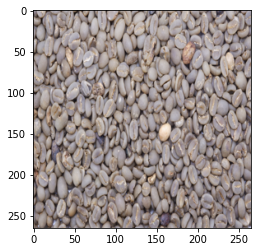

In [0]:
plt.imshow(image_list[20])

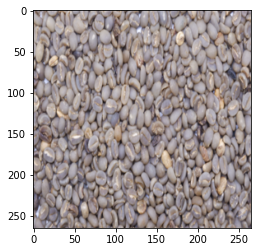

In [0]:
plt.imshow(image_list[200])

# Color Histogram

<function matplotlib.pyplot.show>

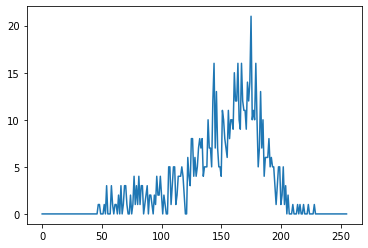

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [0], None, [256], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

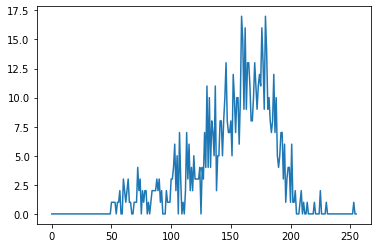

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [1], None, [256], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

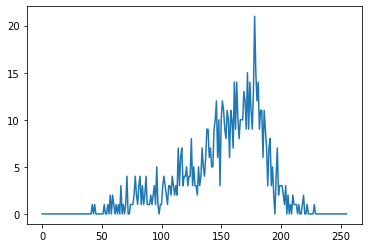

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [2], None, [256], [0,256])
plt.plot(histr)
plt.show

In [0]:
histr.shape

(256, 1)

In [0]:
hist, bin_edges = np.histogram(histr, density=True)

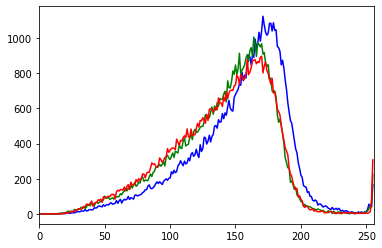

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([arrayImages[5]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [0]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [256], [0,256])
  (hist, _) = np.histogram(colHist, bins=256)
  return hist, colHist

In [0]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
for image in arrayImages:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  listColHist.append((totalHist))
  listImgHist.append(img)
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  900


In [0]:
256 * 3

768

In [0]:
np.array(listColHist).shape

(900, 768)

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(gray_image): #asalnya gray_image
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  #LBPimages = []
  
  #kalau img_gray gak bisa coba pakek image_list
  #grayscalling the image in index first
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3 

  for imgHeight in range(0,gray_image.shape[0] - neighboor):
    for imgWidth in range(0,gray_image.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      # image_list = np.asarray(image_list)
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return imgLBP



# LBP Using Library

In [0]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [0]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  900


In [0]:
np.array(listHistLBP).shape

(900, 256)

(array([208.,  21.,  11.,   2.,   6.,   1.,   2.,   0.,   4.,   1.]),
 array([0.        , 0.00579708, 0.01159416, 0.01739124, 0.02318832,
        0.0289854 , 0.03478248, 0.04057957, 0.04637665, 0.05217373,
        0.05797081]),
 <a list of 10 Patch objects>)

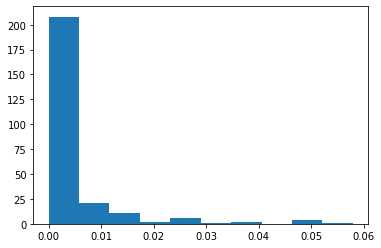

In [0]:
plt.hist(listHistLBP[20])

(array([214.,  14.,  11.,   3.,   6.,   3.,   1.,   0.,   1.,   3.]),
 array([0.        , 0.00598362, 0.01196725, 0.01795087, 0.0239345 ,
        0.02991812, 0.03590174, 0.04188537, 0.04786899, 0.05385262,
        0.05983624]),
 <a list of 10 Patch objects>)

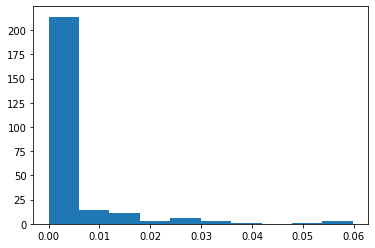

In [0]:
plt.hist(listHistLBP[189])

In [0]:
np.array(listColHist).shape

(900, 768)

In [0]:
listFeature = np.concatenate((listHistLBP, listColHist), axis=1)

In [0]:
listFeature.shape

(900, 1024)

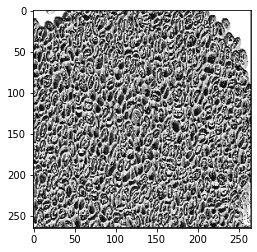

In [0]:
plt.imshow(listImgLBP[0], cmap="gray")

# Random Forrest Classifier

In [0]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### LBP Parameter





In [0]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training LBP Random Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.802653399668325


#### Testing LBP Random Forrest 

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


#print("Akurasi", accuracy_score(y_test, y_pred))
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8181818181818182


### Try Only using Histogram Parameter

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training Histogram using Random Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.3548922056384743


### Testing Histogram using Random Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.3468013468013468


#### Training Concatenate Histogram + LBP using Random Forrest

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7694859038142621


#### Testing concatenate Histogram + LBP using Random Forrest

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8013468013468014


# KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split

### Training LBP using KNN

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.9203980099502488


Testing LBP using KNN

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)
print("Akurasi KNN = ", neigh.score(X_test, y_test))

Akurasi KNN =  0.8653198653198653


### Color histogram using KNN

#### Training Color Histogram using KNN

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.5456053067993366


#### Testing Color Histogram using KNN 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.4882154882154882


#### Training Concate using KNN

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.5456053067993366


#### Testing Concate using KNN

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.49158249158249157


# SVM Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn import svm
clf = svm.SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.3016759776536313


# ANN Classifier

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [0]:
input_shape = (256, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2048)              526336    
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [0]:
#label[label == 3] = 0

label

# 0 1 2

0      0
1      0
2      0
3      0
4      0
      ..
895    4
896    4
897    4
898    4
899    4
Name: label, Length: 900, dtype: int64

In [0]:
y = to_categorical(label, num_classes=5)

In [0]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [0]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(900, 256)

In [0]:
listColHist_new = np.array(listColHist)
listColHist_new.shape

(900, 768)

## ANN with LBP feature

---



### Training LBP using ANN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 60ms/step - loss: 1.6106 - accuracy: 0.1785 - val_loss: 1.6153 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.6068 - accuracy: 0.2424 - val_loss: 1.6267 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.6045 - accuracy: 0.2424 - val_loss: 1.6300 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.6018 - accuracy: 0.2357 - val_loss: 1.6163 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 0s 41ms/step - loss: 1.5989 - accuracy: 0.2290 - val_loss: 1.6139 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 0s 44ms/step - loss: 1.5994 - accuracy: 0.2391 - val_loss: 1.6109 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.5878 - accuracy: 0.2424 - val_loss: 1.5891 - val_accuracy: 0.1824

#### Testing LBP using ANN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 49ms/step - loss: 0.7299 - accuracy: 0.6501 - val_loss: 0.4679 - val_accuracy: 0.8081
Epoch 2/1000
19/19 [==============================] - 1s 34ms/step - loss: 0.7068 - accuracy: 0.6866 - val_loss: 0.4867 - val_accuracy: 0.8316
Epoch 3/1000
19/19 [==============================] - 1s 34ms/step - loss: 0.6131 - accuracy: 0.7214 - val_loss: 0.4358 - val_accuracy: 0.8451
Epoch 4/1000
19/19 [==============================] - 1s 34ms/step - loss: 0.6429 - accuracy: 0.7015 - val_loss: 0.4377 - val_accuracy: 0.8620
Epoch 5/1000
19/19 [==============================] - 1s 33ms/step - loss: 0.6466 - accuracy: 0.6932 - val_loss: 0.4581 - val_accuracy: 0.8620
Epoch 6/1000
19/19 [==============================] - 1s 35ms/step - loss: 0.6637 - accuracy: 0.7048 - val_loss: 0.4556 - val_accuracy: 0.8249
Epoch 7/1000
19/19 [==============================] - 1s 35ms/step - loss: 0.6004 - accuracy: 0.7330 - val_loss: 0.4158 - val_accuracy: 0.8653

## ANN with Color Histogram

In [0]:
input_shape = (768, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2048)              1574912   
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listColHist_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 49ms/step - loss: 8.9859 - accuracy: 0.2139 - val_loss: 2.8409 - val_accuracy: 0.2963
Epoch 2/1000
19/19 [==============================] - 1s 64ms/step - loss: 3.8015 - accuracy: 0.2769 - val_loss: 1.7302 - val_accuracy: 0.3401
Epoch 3/1000
19/19 [==============================] - 1s 44ms/step - loss: 2.3695 - accuracy: 0.3101 - val_loss: 1.4663 - val_accuracy: 0.3367
Epoch 4/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.9064 - accuracy: 0.3317 - val_loss: 1.4032 - val_accuracy: 0.3468
Epoch 5/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.6768 - accuracy: 0.3648 - val_loss: 1.4252 - val_accuracy: 0.3266
Epoch 6/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.5331 - accuracy: 0.4013 - val_loss: 1.3885 - val_accuracy: 0.2963
Epoch 7/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.4624 - accuracy: 0.4129 - val_loss: 1.3811 - val_accuracy: 0.3434

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listColHist_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 64ms/step - loss: 21.3864 - accuracy: 0.3165 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/1000
10/10 [==============================] - 1s 57ms/step - loss: 10.4438 - accuracy: 0.3064 - val_loss: 0.1103 - val_accuracy: 0.9635
Epoch 3/1000
10/10 [==============================] - 1s 57ms/step - loss: 4.5395 - accuracy: 0.2896 - val_loss: 1.1646 - val_accuracy: 0.6153
Epoch 4/1000
10/10 [==============================] - 1s 55ms/step - loss: 3.7226 - accuracy: 0.3300 - val_loss: 1.6962 - val_accuracy: 0.4345
Epoch 5/1000
10/10 [==============================] - 1s 56ms/step - loss: 2.8978 - accuracy: 0.3098 - val_loss: 1.5451 - val_accuracy: 0.4627
Epoch 6/1000
10/10 [==============================] - 1s 53ms/step - loss: 2.2305 - accuracy: 0.3165 - val_loss: 1.2948 - val_accuracy: 0.5058
Epoch 7/1000
10/10 [==============================] - 1s 54ms/step - loss: 1.9413 - accuracy: 0.3401 - val_loss: 1.1544 - val_accuracy: 0.53

ANN For Concate Methods

In [0]:
input_shape = (1024, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))